# KABOSU

## What is Kabosu?
Kabosu is a research-first machine learning project built to understand health-related datasets through disciplined exploratory data analysis and clearly scoped experimentation.

This notebook (v0.1) is intentionally limited to EDA of a diabetes dataset. No modeling. No deployment claims. Just understanding the data.

## Why Kabosu?
Kabosu exists to defy the idea building models before understanding the data.

The goal is to surface:
- dataset structure and imbalance
- synthetic or engineered artifacts
- feature redundancy and leakage proxies
- limits of what the data can meaningfully support

Understanding comes first. Models come later—if warranted.

## When Kabosu?
Kabosu evolves in explicit versions.

- **v0.1**: Exploratory Data Analysis only  
- Later versions will expand scope *only* when justified by evidence, not ambition

Every version is self-contained and auditable.

## How Kabosu?
By progressing in small, honest steps:
- Structured EDA
- Assumption testing
- Visualization-driven reasoning
- Explicit documentation of limitations


## Plans for Kabosu: What Next?
Future versions of Kabosu are exploratory and research-driven, not application-bound.

Planned directions include:
- **Graph Neural Networks (GNNs)** to model relational structure between features, patients, or knowledge graphs
- **Natural Language Processing (NLP)** pipelines to ingest and analyze biomedical literature and unstructured text
- **Physics-Informed Neural Networks (PINNs)** as a framework for embedding domain constraints where appropriate
- **Reinforcement Learning (RL)** for sequential decision modeling and adaptive policy exploration

These components are not promises or a roadmap to deployment.
They are research tools to study representation, structure, and learning behavior under controlled assumptions.


## Why the Name “Kabosu”?
Kabosu is named after Kabosu, the Shiba Inu behind the Doge meme.

The name is a reminder to stay grounded:
- curiosity over ego
- persistence over perfection
- seriousness without self-importance

## Yellow Dog == Smile
A small reminder embedded in the project:
learning should be demanding—but not without joy.


# Kabosu v0.1

## Scope
Kabosu v0.1 is strictly limited to exploratory data analysis (EDA) of a diabetes dataset.

The objective is to understand the dataset’s structure, distributions, relationships, and limitations before any modeling decisions are considered.

No predictive models are trained in this version.

## Objectives
The goals of v0.1 are to:
- Examine class balance and target distribution
- Analyze categorical and numeric feature distributions
- Study feature–target relationships through visualization
- Identify redundancy, correlation structure, and potential leakage proxies
- Assess whether the dataset appears realistic or synthetically constructed

## What v0.1 Is Not
Kabosu v0.1 does **not**:
- make clinical or diagnostic claims
- attempt deployment or decision support
- evaluate model performance
- imply medical validity or real-world applicability

## Outcome
The expected outcome of v0.1 is a documented understanding of:
- what signal exists in the data
- what assumptions are reasonable or violated
- what future methods (if any) could be justified in later versions


## Data Loading

In [ ]:
import pandas as pd 

df= pd.read_csv("Kabosu/data/diabetes_dataset.csv")
df.head()

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1


In [2]:
df.shape

(100000, 31)

In [3]:
df.isna().sum()

age                                   0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
employment_status                     0
smoking_status                        0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
glucose_fasting                       0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64
 11  screen_time_hours_per_day  

## Defining Target, Categorical, Binary and Numerical Columns

In [5]:
TARGET = "diagnosed_diabetes"

categorical_cols = [
    "gender", "ethnicity", "education_level", "income_level",
    "employment_status", "smoking_status", "diabetes_stage"
]

binary_cols = [
    "family_history_diabetes",
    "hypertension_history",
    "cardiovascular_history",
    TARGET
]

numeric_cols = [
    "age", "alcohol_consumption_per_week",
    "physical_activity_minutes_per_week",
    "diet_score", "sleep_hours_per_day",
    "screen_time_hours_per_day", "bmi",
    "waist_to_hip_ratio", "systolic_bp",
    "diastolic_bp", "heart_rate",
    "cholesterol_total", "hdl_cholesterol",
    "ldl_cholesterol", "triglycerides",
    "glucose_fasting", "glucose_postprandial",
    "insulin_level", "hba1c",
    "diabetes_risk_score"
]


## Data Analysis

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

### Target Distribution

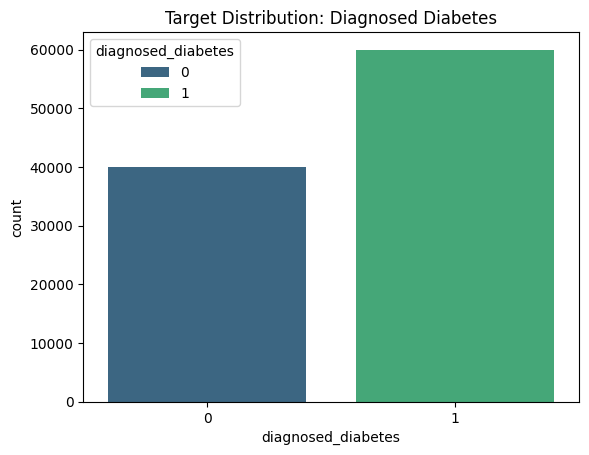

In [7]:
sns.countplot(
    data = df,
    x=TARGET,
    palette="viridis",
    hue=TARGET,
)
plt.title("Target Distribution: Diagnosed Diabetes")
plt.show()

### Categorical Features vs Target

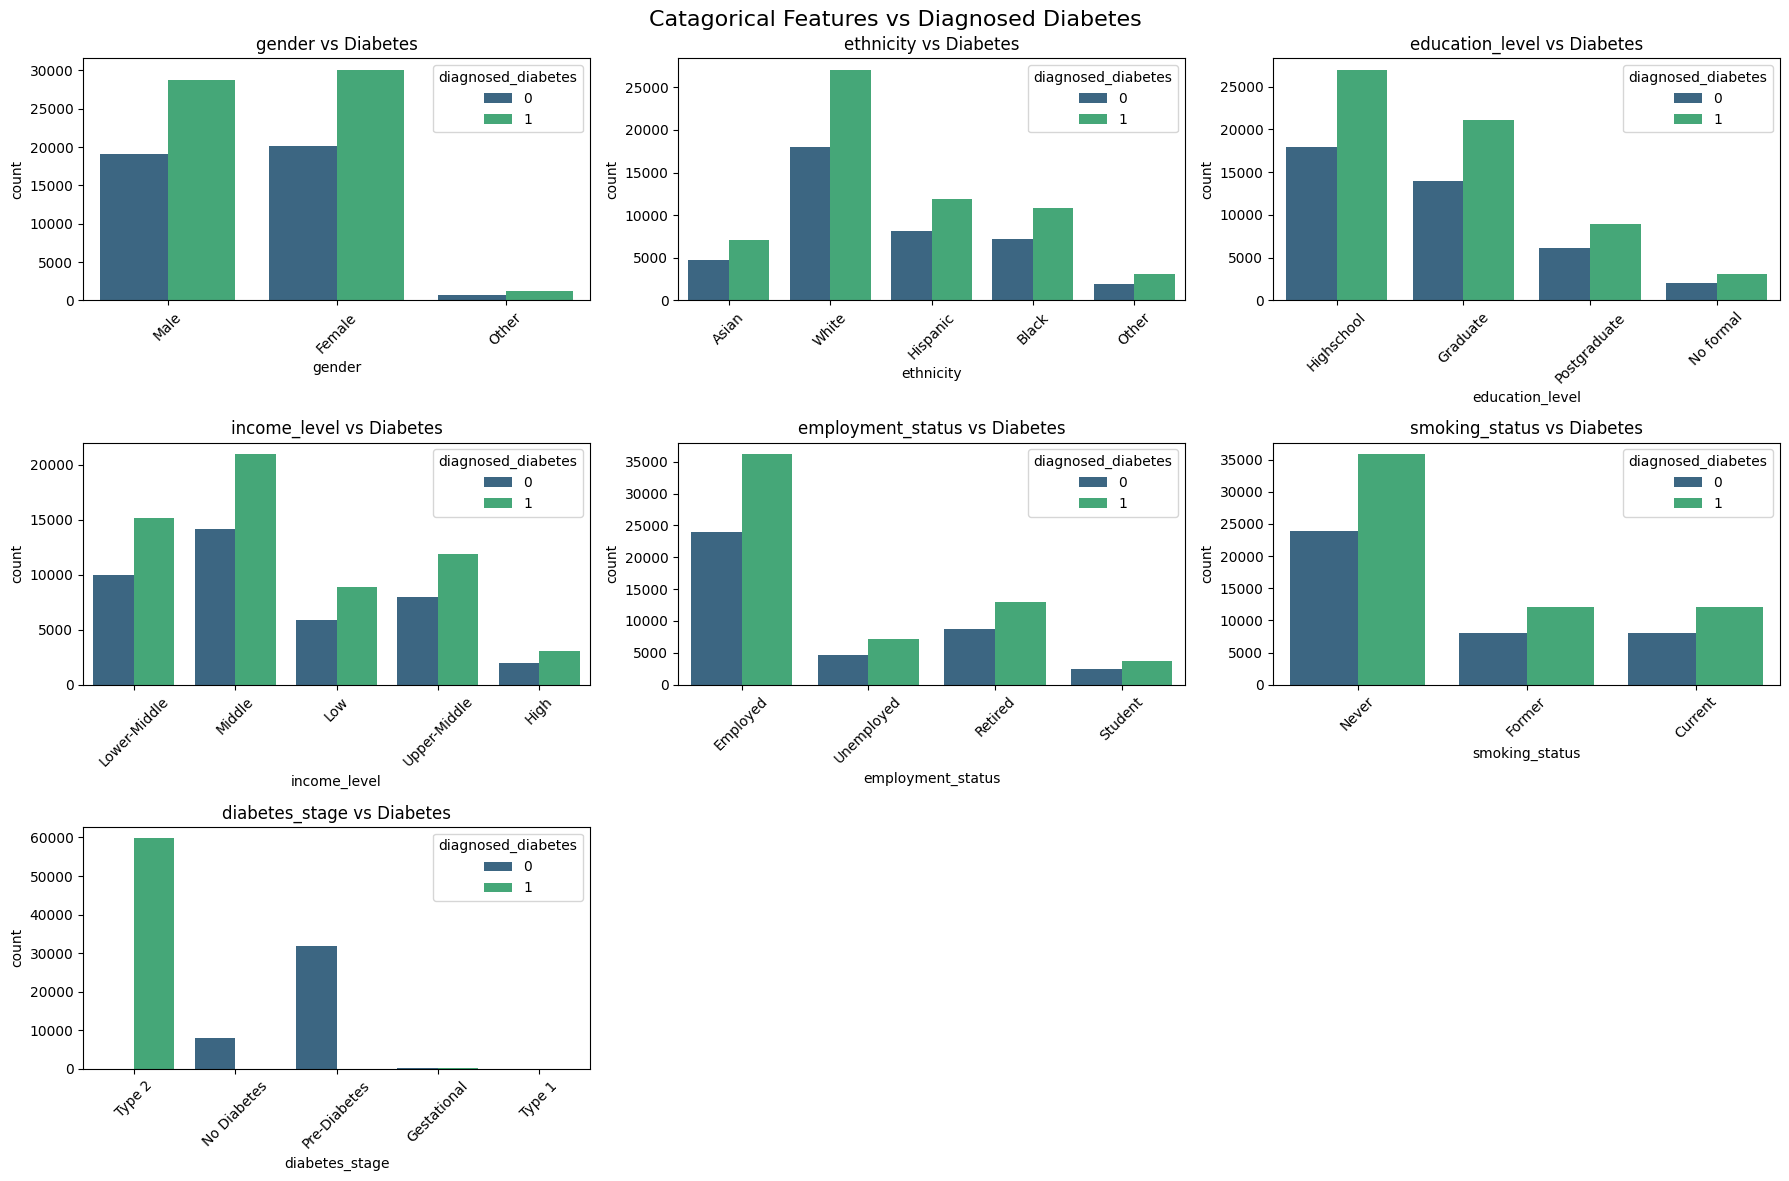

In [8]:
import math

n_cols = 3
n_rows = math.ceil(len(categorical_cols) / n_cols)

fig, axes = plt.subplots(
    n_rows,
    n_cols,
    figsize=(6 * n_cols, 4 * n_rows),
    squeeze=False
)

for ax, col in zip(axes.flatten(), categorical_cols):
    sns.countplot(
        data=df,
        x=col,
        hue=TARGET,
        palette="viridis",
        ax=ax
    )
    ax.set_title(f"{col} vs Diabetes")
    ax.tick_params(axis="x", rotation=45)

# Remove empty subplots (if any)
for ax in axes.flatten()[len(categorical_cols):]:
    ax.remove()


fig.suptitle("Catagorical Features vs Diagnosed Diabetes", fontsize=16)
plt.tight_layout()
plt.show()


### Binary Features vs Target

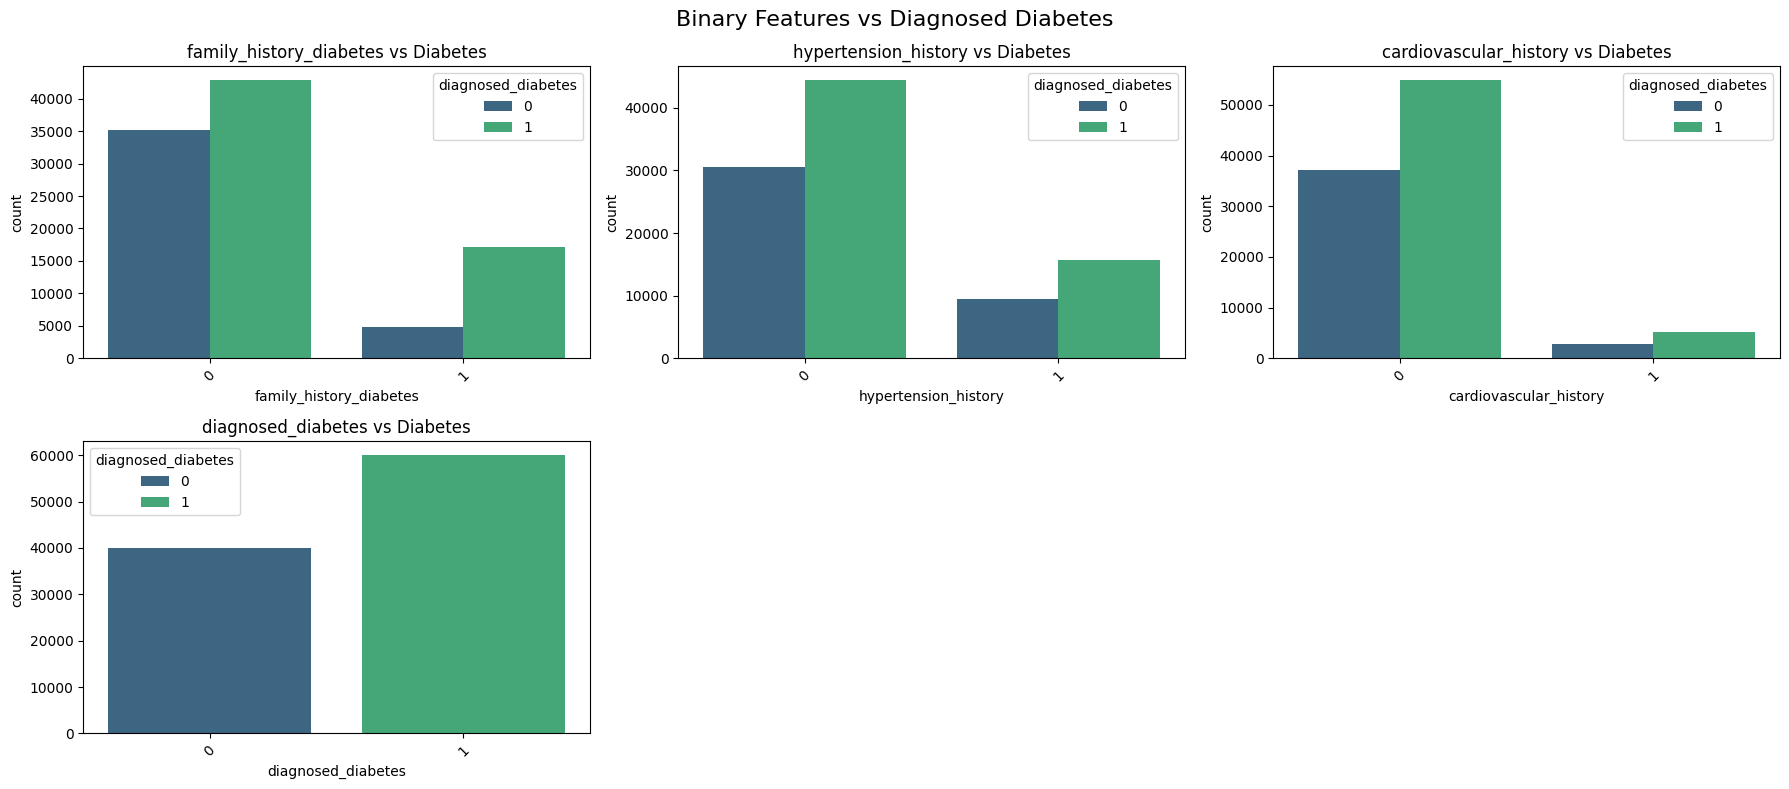

In [9]:
n_cols = 3
n_rows = math.ceil(len(binary_cols) / n_cols)

fig, axes = plt.subplots(
    n_rows,
    n_cols,
    figsize=(6 * n_cols, 4 * n_rows),
    squeeze=False
)

for ax, col in zip(axes.flatten(), binary_cols):
    sns.countplot(
        data=df,
        x=col,
        hue=TARGET,
        palette="viridis",
        ax=ax
    )
    ax.set_title(f"{col} vs Diabetes")
    ax.tick_params(axis="x", rotation=45)


for ax in axes.flatten()[len(binary_cols):]:
    ax.remove()

fig.suptitle("Binary Features vs Diagnosed Diabetes", fontsize=16)
plt.tight_layout()
plt.show()


### Numerical Features distribution

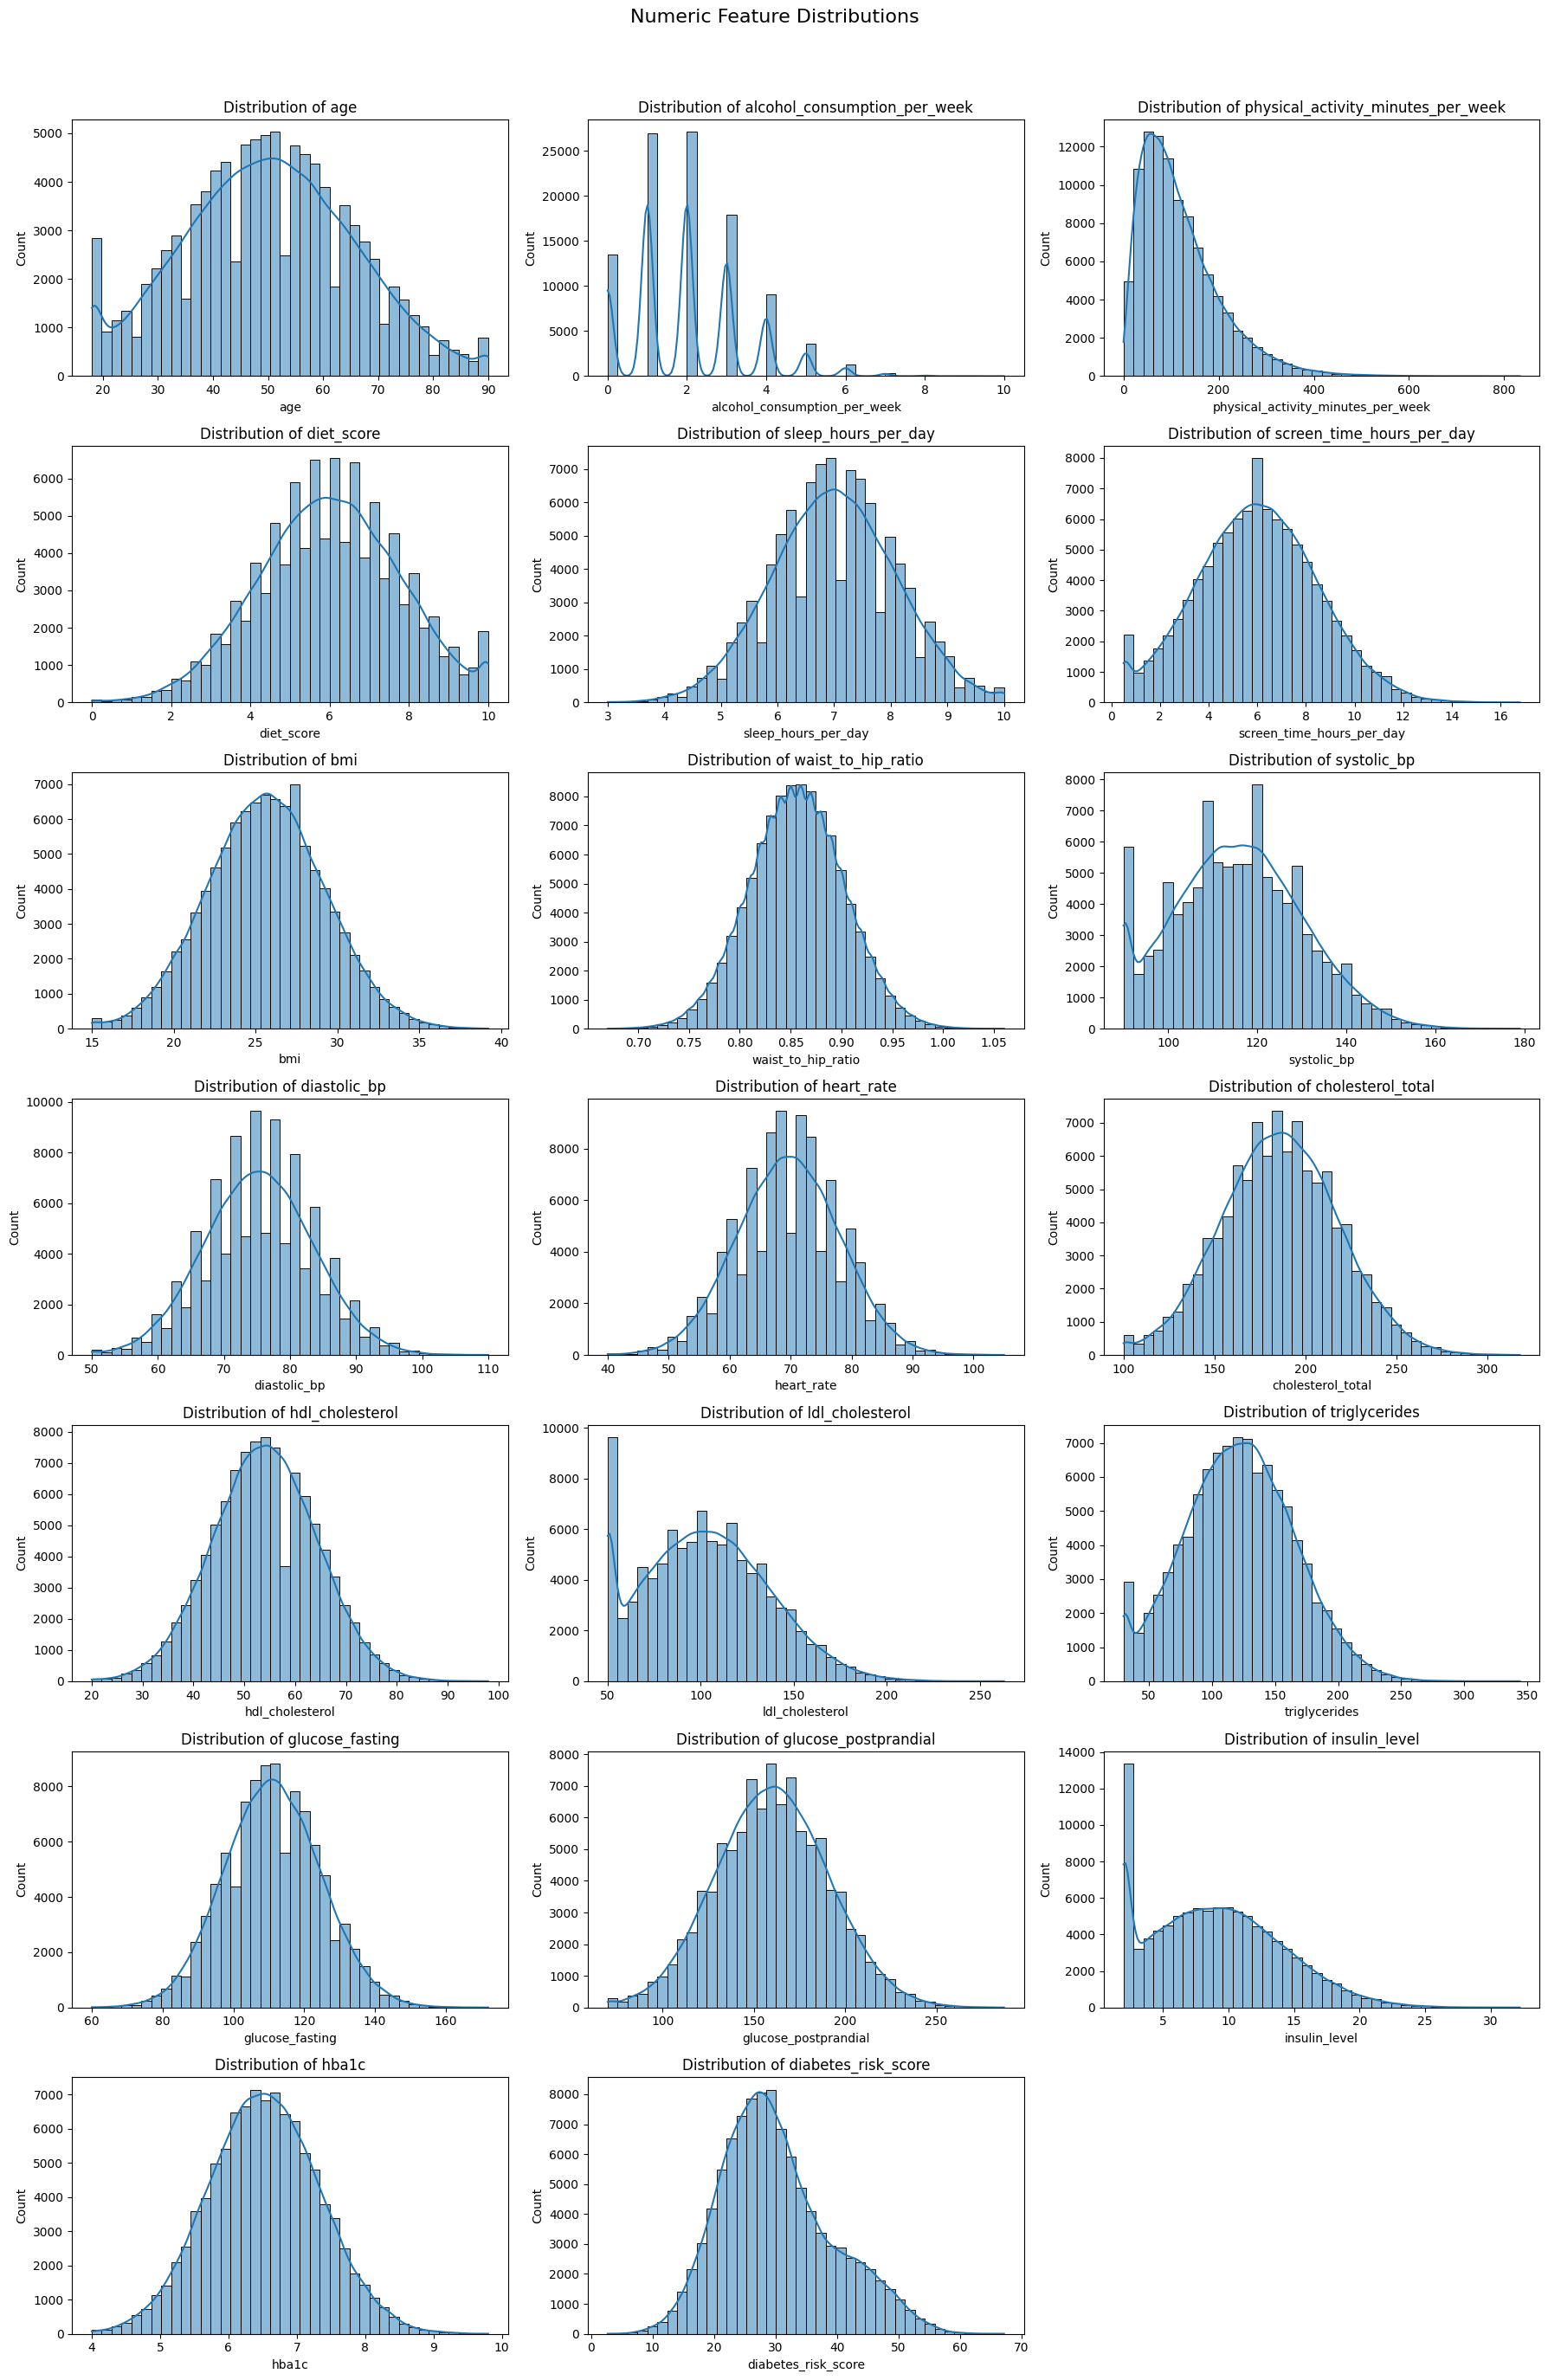

In [10]:
n_cols = 3
n_rows = math.ceil(len(numeric_cols) / n_cols)

fig, axes = plt.subplots(
    n_rows,
    n_cols,
    figsize=(6 * n_cols, 4 * n_rows),
    squeeze=False
)

for ax, col in zip(axes.flatten(), numeric_cols):
    sns.histplot(
        data=df,
        x=col,
        bins=40,
        kde=True,
        ax=ax
    )
    ax.set_title(f"Distribution of {col}")
    ax.set_xlabel(col)

# Remove empty subplots
for ax in axes.flatten()[len(numeric_cols):]:
    ax.remove()

fig.suptitle("Numeric Feature Distributions", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Numerical Features vs Target 

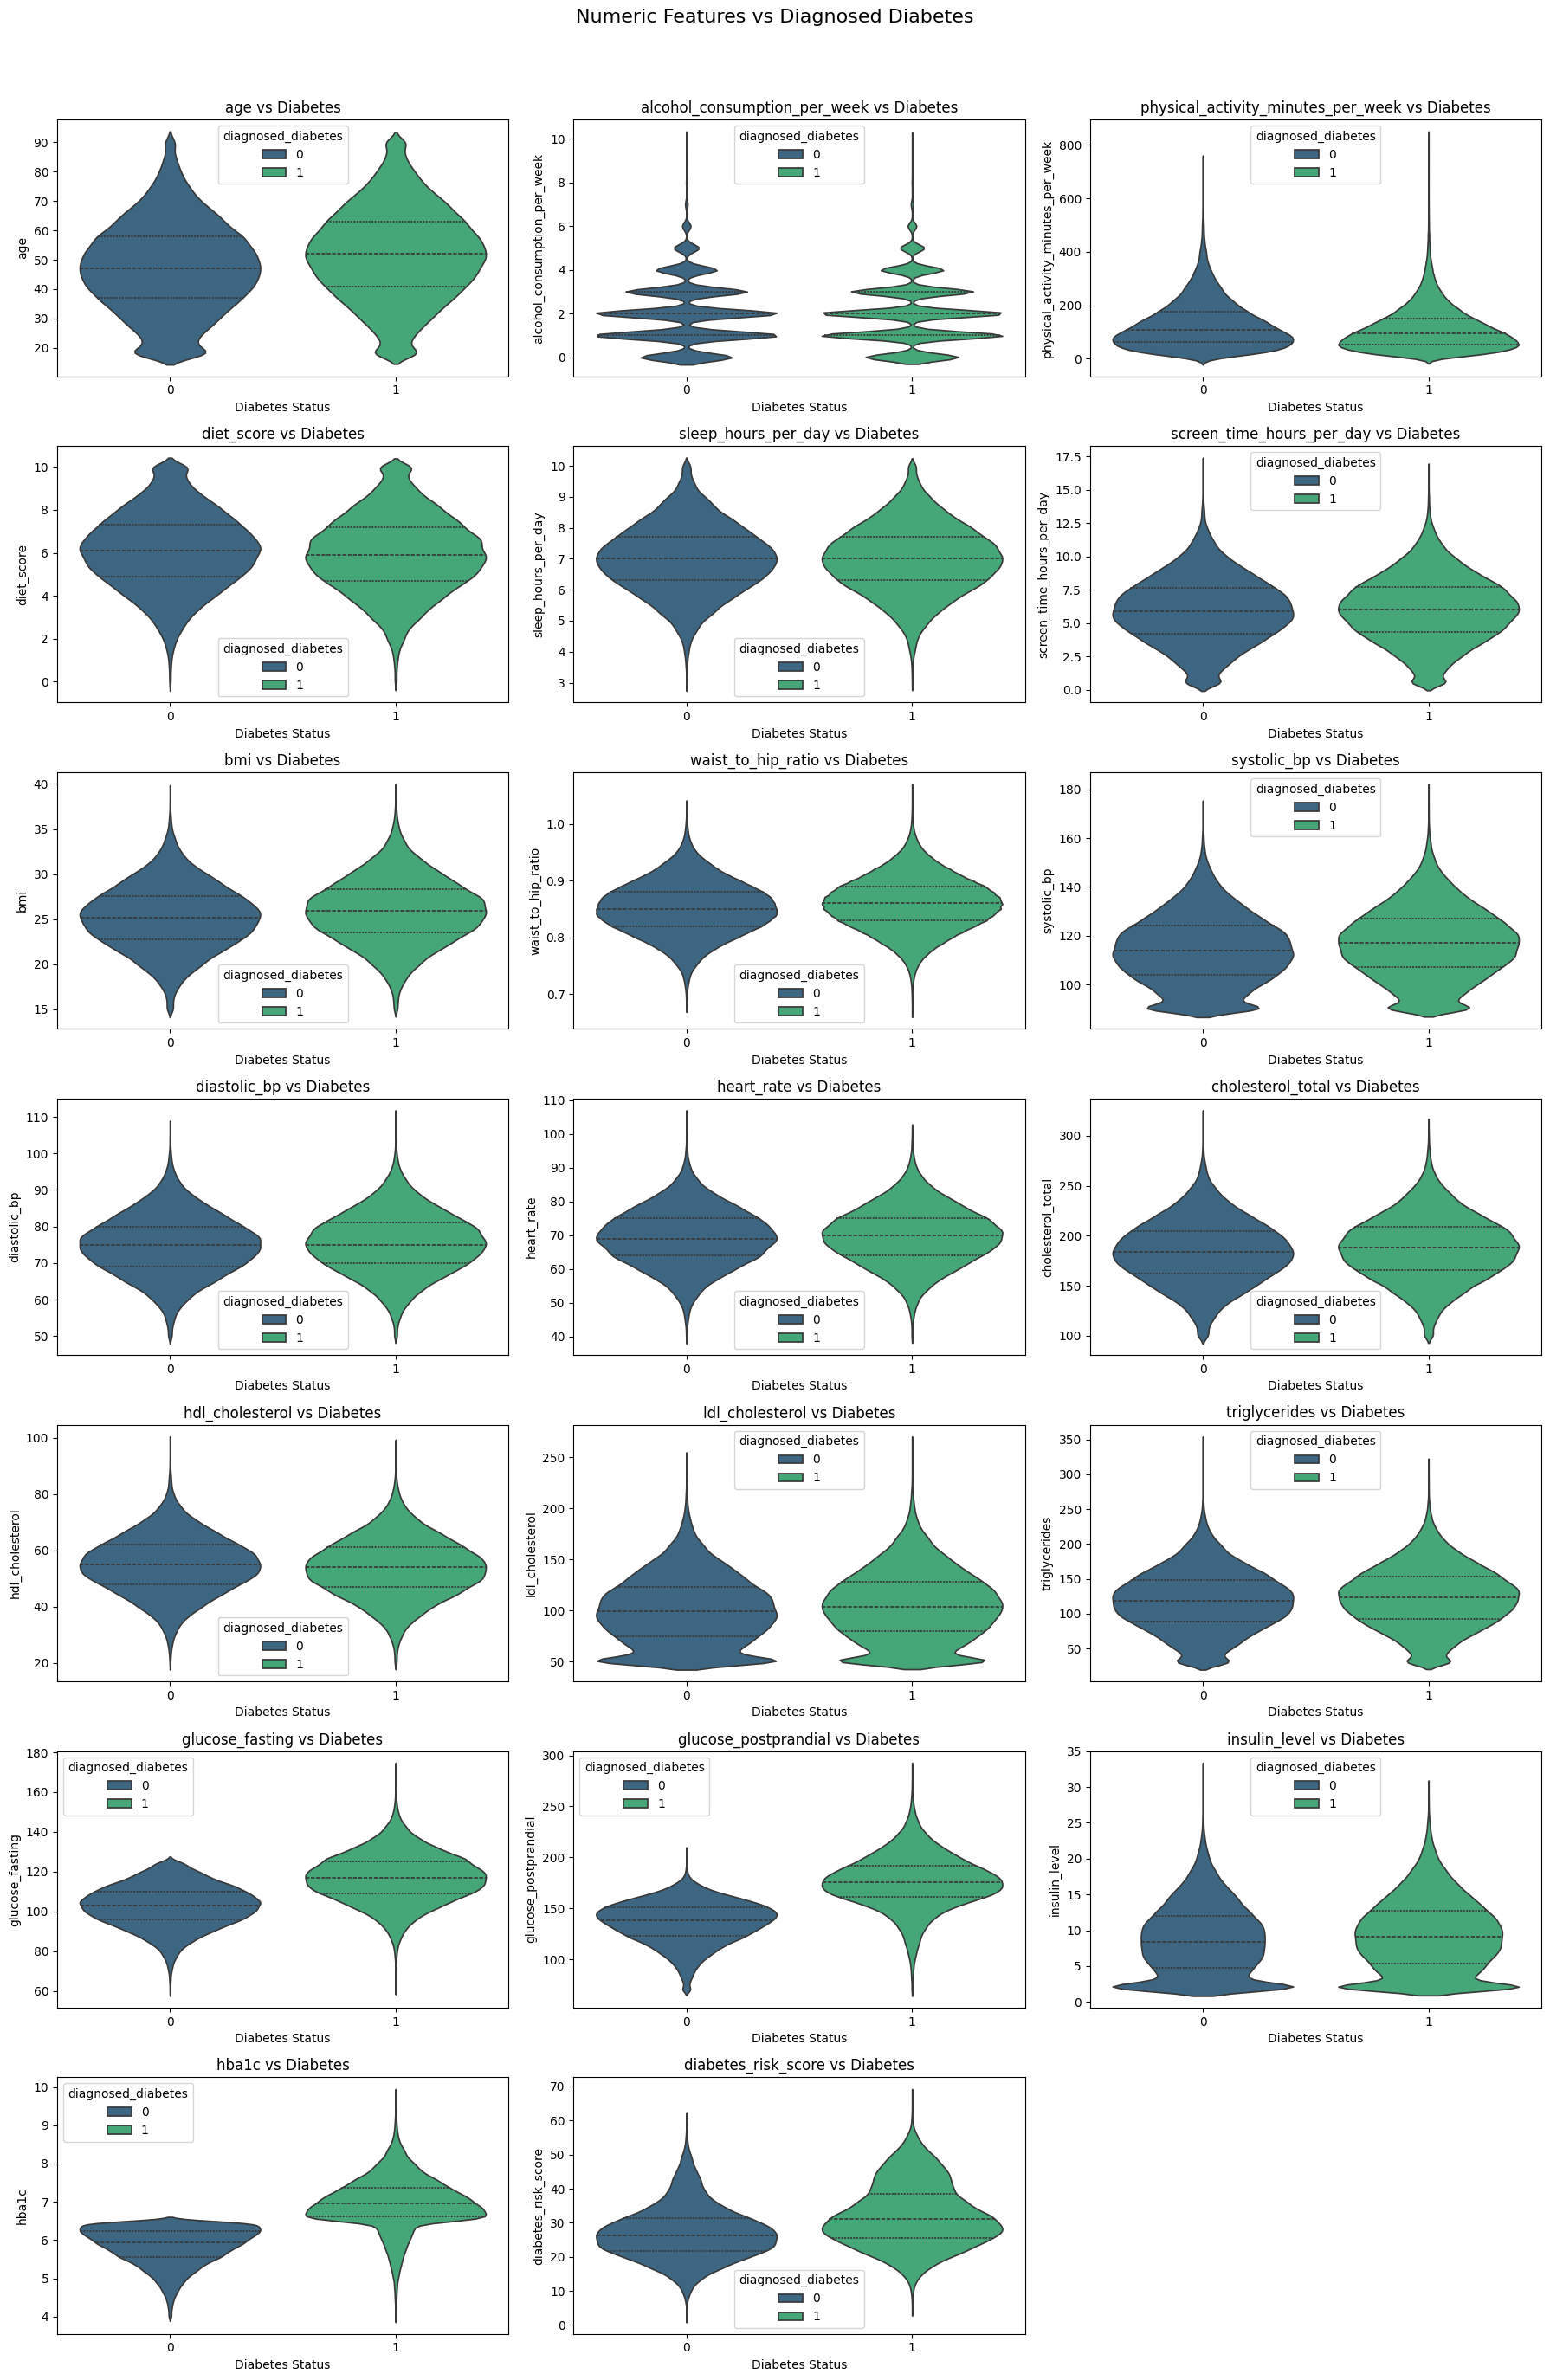

In [11]:
n_cols = 3
n_rows = math.ceil(len(numeric_cols) / n_cols)

fig, axes = plt.subplots(
    n_rows,
    n_cols,
    figsize=(6 * n_cols, 4 * n_rows),
    squeeze=False
)

for ax, col in zip(axes.flatten(), numeric_cols):
    sns.violinplot(
        data=df,
        x=TARGET,
        y=col,
        inner="quartile",
        hue = TARGET,
        palette="viridis",
        ax=ax
    )
    ax.set_title(f"{col} vs Diabetes")
    ax.set_xlabel("Diabetes Status")

# Remove unused axes
for ax in axes.flatten()[len(numeric_cols):]:
    ax.remove()

fig.suptitle("Numeric Features vs Diagnosed Diabetes", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Correlation Heatmap

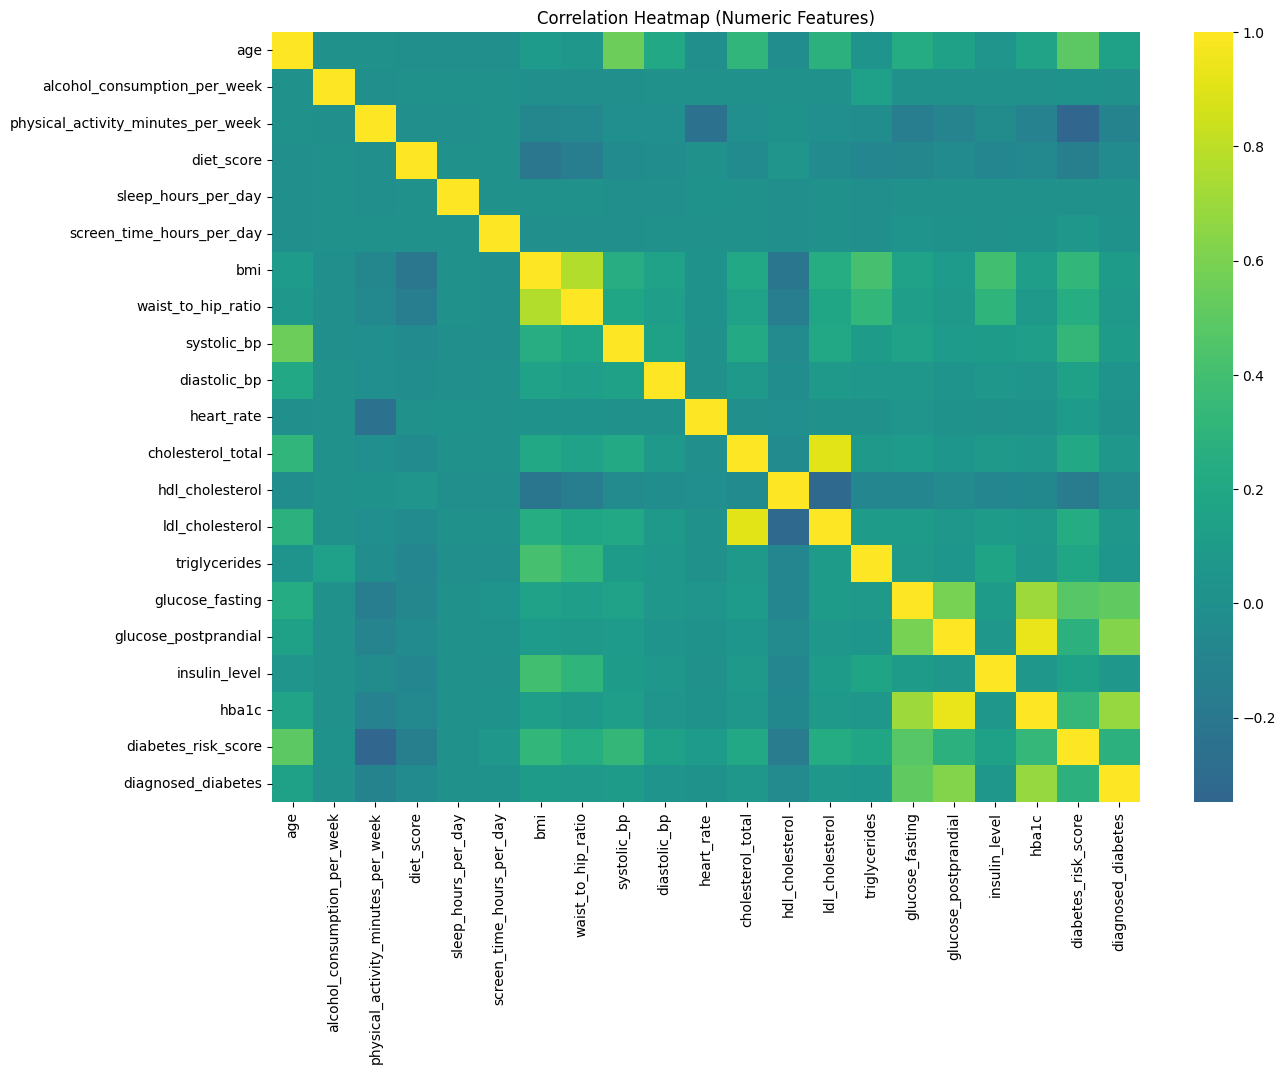

In [12]:
plt.figure(figsize=(14,10))
sns.heatmap(
    df[numeric_cols + [TARGET]].corr(),
    cmap="viridis",
    center=0
)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


# EDA Closure
The correlation analysis concludes Kabosu v0.1.

At this stage, the dataset’s structure, internal relationships, and limitations are sufficiently characterized. Any further analysis would require introducing modeling assumptions, which are intentionally deferred to later versions.


# CITATION

Data was obtained from the following dataset: 
https://doi.org/10.34740/kaggle/dsv/13128284